## Data Preprocessing

In [121]:
import os
import numpy as np
from os import listdir
from matplotlib.pyplot import imread
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Settings:
img_size = 64
grayscale_images = True
num_class = 10
test_size = 0.2


def get_img(data_path):
    # Getting image array from path:
    img = imread(data_path)
    img = resize(img, (img_size, img_size, 1 if grayscale_images else 3))
    return img


def get_dataset(dataset_path='Dataset'):
    # Getting all data from data path:
    try:
        X = np.load('npy_dataset/X.npy')
        Y = np.load('npy_dataset/Y.npy')
    except:
        labels = ['0','1','2','3','4','5','6','7','8','9']  # Geting labels
        X = []
        Y = []
        for i, label in enumerate(labels):
            datas_path = dataset_path + '/' + label
            for data in listdir(datas_path):
                img = get_img(datas_path + '/' + data)
                X.append(img)
                Y.append(i)
        # Create dateset:
        print(X[0])
        X = np.array(X).astype('float32')
        print(X[0])
        Y = np.array(Y).astype('float32')
        Y = to_categorical(Y, num_class)
        if not os.path.exists('npy_dataset/'):
            os.makedirs('npy_dataset/')
        np.save('npy_dataset/X.npy', X)
        np.save('npy_dataset/Y.npy', Y)
    X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    return X, X_test, Y, Y_test


X, X_test, Y, Y_test = get_dataset()

# import os
# import numpy as np
# from os import listdir
# from matplotlib.pyplot import imread
# from skimage.transform import resize
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split


# # Settings:
# img_size = 64
# grayscale_images = True
# num_class = 10
# test_size = 0.2

# from PIL import Image
# def get_img(data_path):
#     # Getting image array from path:
#     # print("=====================================================")
#     # print(type(imread(data_path)))
#     img = Image.open(data_path)
#     # print(type(np.array(img).astype("float32")))
#     # img = resize(img, (img_size, img_size, 1 if grayscale_images else 3))
#     return img.convert("L")


# def get_dataset(dataset_path='Dataset'):
#     # Getting all data from data path:
#     try:
#         X = np.load('npy_dataset/X.npy')
#         Y = np.load('npy_dataset/Y.npy')
#     except:
#         labels = ['0','1','2','3','4','5','6','7','8','9']  # Geting labels
#         X = []
#         Y = []
#         for i, label in enumerate(labels):
#             datas_path = dataset_path + '/' + label
#             for data in listdir(datas_path):
#                 img = get_img(datas_path + '/' + data)
#                 X.append(np.array(img).astype("float32") / 255.0)
#                 Y.append(i)
#         # Create dateset:
#         X = np.asarray(X)
#         Y = np.array(Y).astype('float32')
#         Y = to_categorical(Y, num_class)
#         if not os.path.exists('npy_dataset/'):
#             os.makedirs('npy_dataset/')
#         np.save('npy_dataset/X.npy', X)
#         np.save('npy_dataset/Y.npy', Y)
#     X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
#     return X, X_test, Y, Y_test


# X, X_test, Y, Y_test = get_dataset()


[[[0.7073116 ]
  [0.71658715]
  [0.71990046]
  ...
  [0.66904044]
  [0.65994104]
  [0.6484539 ]]

 [[0.70810447]
  [0.71703211]
  [0.72156666]
  ...
  [0.69253613]
  [0.67930978]
  [0.65075901]]

 [[0.7085922 ]
  [0.71666849]
  [0.72156847]
  ...
  [0.69311375]
  [0.68349589]
  [0.65517883]]

 ...

 [[0.61652427]
  [0.62149789]
  [0.62546464]
  ...
  [0.33098427]
  [0.32004212]
  [0.3317081 ]]

 [[0.60912441]
  [0.61516338]
  [0.62131258]
  ...
  [0.32667504]
  [0.31709116]
  [0.31044535]]

 [[0.60432711]
  [0.60793866]
  [0.61367138]
  ...
  [0.33833644]
  [0.32276323]
  [0.30902006]]]
[[[0.7073116 ]
  [0.7165871 ]
  [0.7199005 ]
  ...
  [0.66904044]
  [0.659941  ]
  [0.6484539 ]]

 [[0.7081045 ]
  [0.71703213]
  [0.7215667 ]
  ...
  [0.6925361 ]
  [0.6793098 ]
  [0.650759  ]]

 [[0.7085922 ]
  [0.7166685 ]
  [0.72156847]
  ...
  [0.69311374]
  [0.6834959 ]
  [0.65517884]]

 ...

 [[0.6165243 ]
  [0.62149787]
  [0.6254646 ]
  ...
  [0.33098426]
  [0.32004213]
  [0.3317081 ]]

 [[0.609

## Imports

In [122]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report
y = np.argmax(Y, axis=1)
y_test = np.argmax(Y_test, axis=1)
y.shape
print(X.shape)
print(X[0].shape)
print(type(X))
print(type(X[0]))

(1649, 64, 64, 1)
(64, 64, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [123]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report
y = np.argmax(Y, axis=1)
y_test = np.argmax(Y_test, axis=1)
y.shape
print(type(X[0]))

<class 'numpy.ndarray'>


In [124]:
def visualize_image_gray(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image, cmap=plt.cm.binary)

In [125]:
def visualize_image_rgb(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image)

## Images Visualization

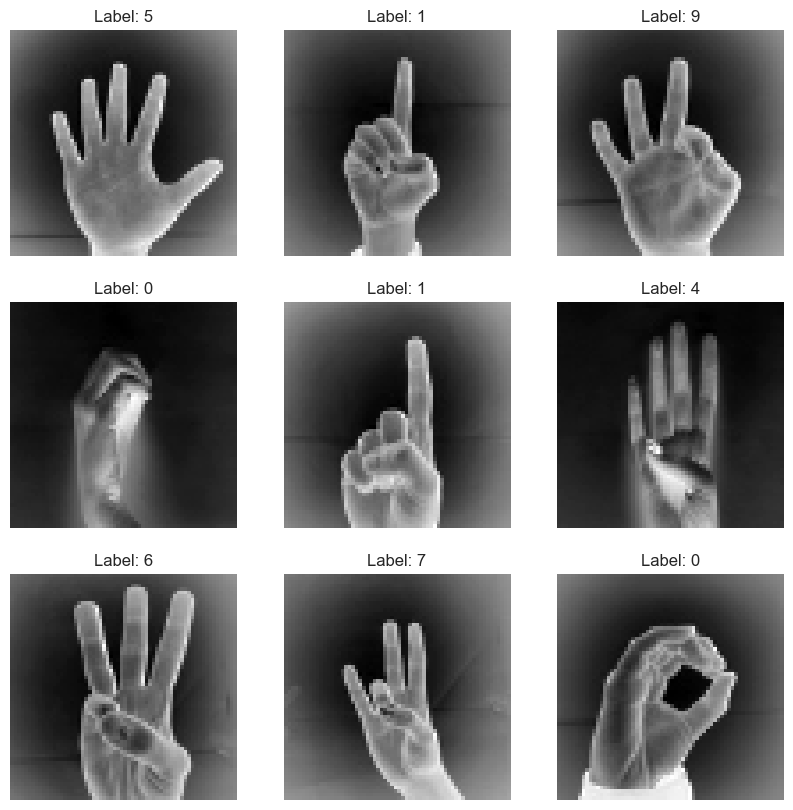

In [126]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    visualize_image_gray(X[i * 100], label="Label: " + str(y[i * 100]))

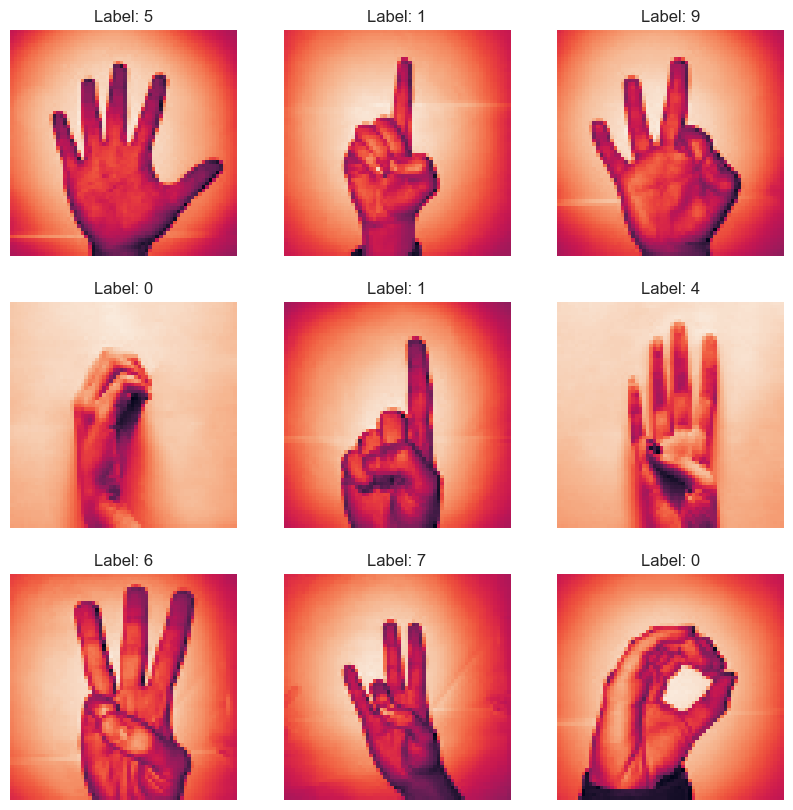

In [127]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    visualize_image_rgb(X[i * 100], label="Label: " + str(y[i * 100]))

## Preparing model

In [128]:
inputs = tf.keras.Input(shape=(img_size, img_size, 1))

conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu')(inputs)
pool1 = tf.keras.layers.AveragePooling2D()(conv1)

conv2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu')(pool1)
pool2 = tf.keras.layers.AveragePooling2D()(conv2)

flatten = tf.keras.layers.Flatten()(pool2)

dense1 = tf.keras.layers.Dense(units=120, activation='relu')(flatten)
dense2 = tf.keras.layers.Dense(units=84, activation='relu')(dense1)

outputs = tf.keras.layers.Dense(units=10, activation='softmax')(dense2)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

## Training

In [129]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X,
    y,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
42/42 [==============================] - 1s 28ms/step - loss: 2.3023 - accuracy: 0.1403 - val_loss: 2.2731 - val_accuracy: 0.2091
Epoch 2/100
42/42 [==============================] - 1s 25ms/step - loss: 2.0635 - accuracy: 0.2972 - val_loss: 1.7327 - val_accuracy: 0.3697
Epoch 3/100
42/42 [==============================] - 1s 26ms/step - loss: 1.4167 - accuracy: 0.5406 - val_loss: 1.3049 - val_accuracy: 0.5848
Epoch 4/100
42/42 [==============================] - 1s 26ms/step - loss: 1.0229 - accuracy: 0.6793 - val_loss: 1.0457 - val_accuracy: 0.6758
Epoch 5/100
42/42 [==============================] - 1s 26ms/step - loss: 0.8346 - accuracy: 0.7195 - val_loss: 0.8903 - val_accuracy: 0.7182
Epoch 6/100
42/42 [==============================] - 1s 26ms/step - loss: 0.6543 - accuracy: 0.7885 - val_loss: 0.7757 - val_accuracy: 0.7455
Epoch 7/100
42/42 [==============================] - 1s 27ms/step - loss: 0.5617 - accuracy: 0.8173 - val_loss: 0.6871 - val_accuracy: 0.7879
Epoch 

## Evaluating

In [130]:
def evaluate_model(model, X_test, y_test):
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    results = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

Test Loss: 0.55010
Test Accuracy: 83.54%


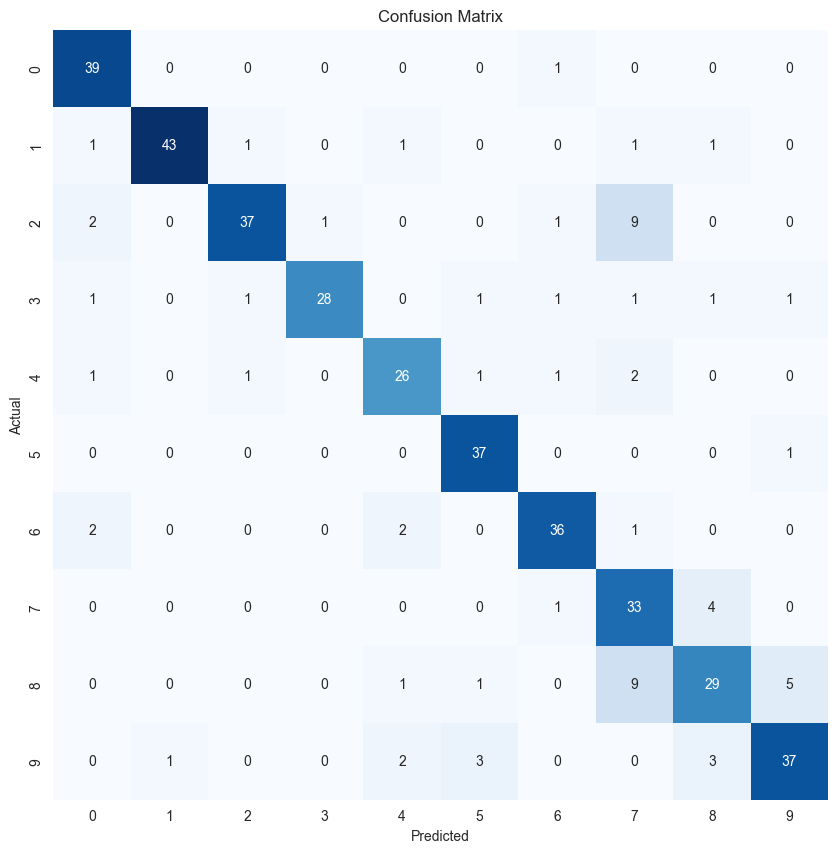

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.85      0.97      0.91        40
           1       0.98      0.90      0.93        48
           2       0.93      0.74      0.82        50
           3       0.97      0.80      0.88        35
           4       0.81      0.81      0.81        32
           5       0.86      0.97      0.91        38
           6       0.88      0.88      0.88        41
           7       0.59      0.87      0.70        38
           8       0.76      0.64      0.70        45
           9       0.84      0.80      0.82        46

    accuracy                           0.84       413
   macro avg       0.85      0.84      0.84       413
weighted avg       0.85      0.84      0.84       413



In [131]:
evaluate_model(model, X_test, y_test)

In [132]:
y_pred = np.argmax(model.predict(X_test), axis=1)
pred = model.predict(X_test)

In [133]:
pred[0]

array([1.1311867e-05, 4.9980025e-07, 1.9908553e-05, 1.0126049e-04,
       8.5151571e-01, 5.7470924e-03, 5.8028381e-03, 4.0037092e-02,
       5.4843679e-02, 4.1920695e-02], dtype=float32)

# ANN

In [134]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2 , random_state = 42)
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_class, activation=tf.nn.softmax)
])

model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(X, Y, batch_size=32, validation_data=[X_val, Y_val], epochs=30, callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=7,
            restore_best_weights=True
        )
    ])

Epoch 1/30


c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


52/52 [==============================] - 1s 13ms/step - loss: 2.8467 - accuracy: 0.1025 - val_loss: 2.2948 - val_accuracy: 0.1364
Epoch 2/30
52/52 [==============================] - 1s 11ms/step - loss: 2.3012 - accuracy: 0.1007 - val_loss: 2.3033 - val_accuracy: 0.0879
Epoch 3/30
52/52 [==============================] - 1s 11ms/step - loss: 2.3026 - accuracy: 0.1037 - val_loss: 2.3036 - val_accuracy: 0.0879
Epoch 4/30
52/52 [==============================] - 1s 11ms/step - loss: 2.3025 - accuracy: 0.1037 - val_loss: 2.3040 - val_accuracy: 0.0879
Epoch 5/30
52/52 [==============================] - 1s 11ms/step - loss: 2.3025 - accuracy: 0.1043 - val_loss: 2.3043 - val_accuracy: 0.0879
Epoch 6/30
52/52 [==============================] - 1s 11ms/step - loss: 2.3023 - accuracy: 0.0976 - val_loss: 2.3043 - val_accuracy: 0.0879
Epoch 7/30
52/52 [==============================] - 1s 11ms/step - loss: 2.3021 - accuracy: 0.1043 - val_loss: 2.3047 - val_accuracy: 0.0879
Epoch 8/30
52/52 [======

In [135]:
score = model1.evaluate(X_test, Y_test)
print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]))

13/13 [==============================] - 0s 3ms/step - loss: 2.2964 - accuracy: 0.1308
Loss: 2.2964  Accuaracy: 0.1308%


In [136]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  # tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  # tf.keras.layers.Dense(128, activation=tf.nn.relu),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  # tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(32, activation=tf.nn.relu),
  # tf.keras.layers.Dense(32, activation=tf.nn.relu),
  # tf.keras.layers.Dense(16, activation=tf.nn.relu),
  tf.keras.layers.Dense(num_class, activation=tf.nn.softmax)
])

model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(X, Y, batch_size=32, validation_data=[X_val, Y_val], epochs=100, callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=7,
            restore_best_weights=True
        )
    ])

Epoch 1/100
52/52 [==============================] - 1s 13ms/step - loss: 2.4444 - accuracy: 0.1061 - val_loss: 2.3461 - val_accuracy: 0.0848
Epoch 2/100
52/52 [==============================] - 1s 11ms/step - loss: 2.3091 - accuracy: 0.1207 - val_loss: 2.3391 - val_accuracy: 0.1212
Epoch 3/100
52/52 [==============================] - 1s 11ms/step - loss: 2.3056 - accuracy: 0.1152 - val_loss: 2.2805 - val_accuracy: 0.1727
Epoch 4/100
52/52 [==============================] - 1s 11ms/step - loss: 2.2799 - accuracy: 0.1383 - val_loss: 2.2502 - val_accuracy: 0.1424
Epoch 5/100
52/52 [==============================] - 1s 11ms/step - loss: 2.2074 - accuracy: 0.1874 - val_loss: 2.3426 - val_accuracy: 0.1879
Epoch 6/100
52/52 [==============================] - 1s 11ms/step - loss: 2.1242 - accuracy: 0.2104 - val_loss: 2.0858 - val_accuracy: 0.1909
Epoch 7/100
52/52 [==============================] - 1s 11ms/step - loss: 2.0732 - accuracy: 0.2298 - val_loss: 2.0179 - val_accuracy: 0.2242
Epoch 

In [137]:
score = model2.evaluate(X_test, Y_test)
print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]))

13/13 [==============================] - 0s 3ms/step - loss: 0.8043 - accuracy: 0.7530
Loss: 0.8043  Accuaracy: 0.753%
